# Covid Tracker

## Steps
1. Get data
2. Clean the data
3. Visualization of current data
4. Make a model
5. Train and test the model
6. Upload online with proper visualizations

In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_rows', None)

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
r = requests.get(url, allow_redirects=True)

In [3]:
open('covid-data.csv', 'wb').write(r.content)

17720326

In [4]:
data = pd.read_csv('covid-data.csv')

drop_cols = ['total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million',
             'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million',
             'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients',
             'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
             'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
             'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
             'new_tests_smoothed_per_thousand', 'tests_per_case', 'tests_units',
             'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
             'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million',
             'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older',
             'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
             'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities',
             'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']
data.drop(columns=drop_cols, inplace=True)

data[data.location == 'India'].tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed
29027,IND,Asia,India,2021-02-14,10916589.0,11649.0,11199.286,155732.0,90.0,93.143,0.016,8285295.0,NaN,NaN,21437.0,353276.0
29028,IND,Asia,India,2021-02-15,10925710.0,9121.0,11200.857,155813.0,81.0,93.571,NaN,8720822.0,NaN,NaN,435527.0,351688.0
29029,IND,Asia,India,2021-02-16,10937320.0,11610.0,11278.429,155913.0,100.0,94.429,NaN,8999230.0,NaN,NaN,278408.0,341096.0
29030,IND,Asia,India,2021-02-17,10950201.0,12881.0,11272.429,156014.0,101.0,93.429,NaN,9422228.0,NaN,NaN,422998.0,343588.0
29031,IND,Asia,India,2021-02-18,10963394.0,13193.0,11827.286,156111.0,97.0,94.857,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(69788, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69788 entries, 0 to 69787
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   iso_code                   69788 non-null  object 
 1   continent                  66307 non-null  object 
 2   location                   69788 non-null  object 
 3   date                       69788 non-null  object 
 4   total_cases                68943 non-null  float64
 5   new_cases                  68941 non-null  float64
 6   new_cases_smoothed         67940 non-null  float64
 7   total_deaths               59974 non-null  float64
 8   new_deaths                 60132 non-null  float64
 9   new_deaths_smoothed        67940 non-null  float64
 10  positive_rate              33758 non-null  float64
 11  total_vaccinations         2177 non-null   float64
 12  people_vaccinated          1785 non-null   float64
 13  people_fully_vaccinated    1126 non-null   flo

In [7]:
data['date'] = pd.to_datetime(data['date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69788 entries, 0 to 69787
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   iso_code                   69788 non-null  object        
 1   continent                  66307 non-null  object        
 2   location                   69788 non-null  object        
 3   date                       69788 non-null  datetime64[ns]
 4   total_cases                68943 non-null  float64       
 5   new_cases                  68941 non-null  float64       
 6   new_cases_smoothed         67940 non-null  float64       
 7   total_deaths               59974 non-null  float64       
 8   new_deaths                 60132 non-null  float64       
 9   new_deaths_smoothed        67940 non-null  float64       
 10  positive_rate              33758 non-null  float64       
 11  total_vaccinations         2177 non-null   float64       
 12  peop

In [9]:
data.isna().sum()

iso_code                         0
continent                     3481
location                         0
date                             0
total_cases                    845
new_cases                      847
new_cases_smoothed            1848
total_deaths                  9814
new_deaths                    9656
new_deaths_smoothed           1848
positive_rate                36030
total_vaccinations           67611
people_vaccinated            68003
people_fully_vaccinated      68662
new_vaccinations             67957
new_vaccinations_smoothed    66666
dtype: int64

In [10]:
for column in data:
    if column != 'continent':
        data[column].fillna(0, inplace=True)
data.isna().sum()

iso_code                        0
continent                    3481
location                        0
date                            0
total_cases                     0
new_cases                       0
new_cases_smoothed              0
total_deaths                    0
new_deaths                      0
new_deaths_smoothed             0
positive_rate                   0
total_vaccinations              0
people_vaccinated               0
people_fully_vaccinated         0
new_vaccinations                0
new_vaccinations_smoothed       0
dtype: int64

In [11]:
data.location.nunique()

212

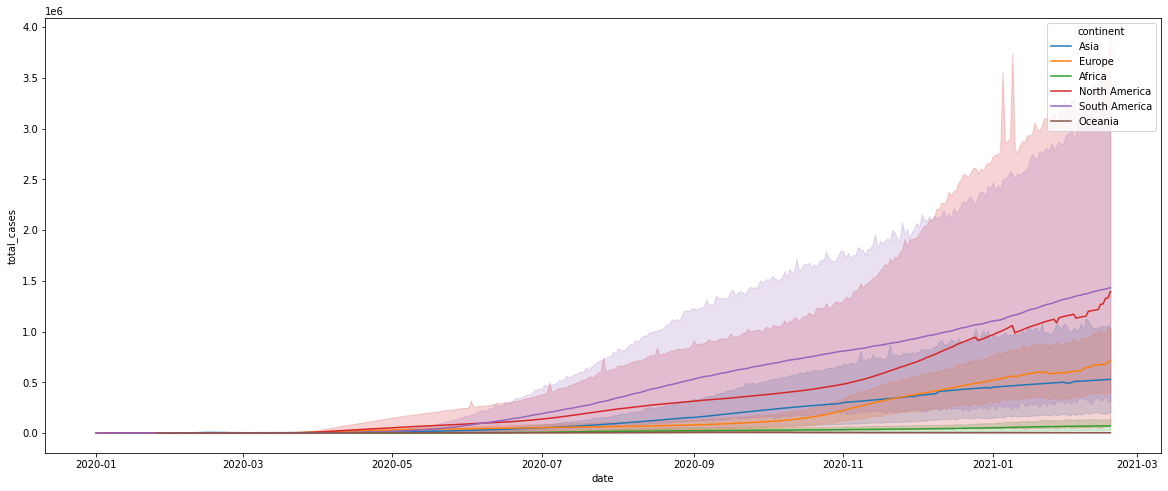

In [12]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data, x='date', y='total_cases', hue='continent');